## This is the title of the project.

This is the description of the project, especially the goal.

In [1]:
import pandas as pd

fandango_score = pd.read_csv('fandango_score_comparison.csv')
movie_ratings = pd.read_csv('movie_ratings_16_17.csv')

fandango_score.head()

FILM  RottenTomatoes  RottenTomatoes_User  \
0  Avengers: Age of Ultron (2015)              74                   86   
1               Cinderella (2015)              85                   80   
2                  Ant-Man (2015)              80                   90   
3          Do You Believe? (2015)              18                   84   
4   Hot Tub Time Machine 2 (2015)              14                   28   

   Metacritic  Metacritic_User  IMDB  Fandango_Stars  Fandango_Ratingvalue  \
0          66              7.1   7.8             5.0                   4.5   
1          67              7.5   7.1             5.0                   4.5   
2          64              8.1   7.8             5.0                   4.5   
3          22              4.7   5.4             5.0                   4.5   
4          29              3.4   5.1             3.5                   3.0   

   RT_norm  RT_user_norm         ...           IMDB_norm  RT_norm_round  \
0     3.70           4.3         ...                3.90            3.5   
1     4.25           4.0         ...                3.55            4.5   
2     4.00           4.5         ...                3.90            4.0   
3     0.90           4.2         ...                2.70            1.0   
4     0.70           1.4         ...                2.55            0.5   

   RT_user_norm_round  Metacritic_norm_round  Metacritic_user_norm_round  \
0                 4.5                    3.5                         3.5   
1                 4.0                    3.5                         4.0   
2                 4.5                    3.0                         4.0   
3                 4.0                    1.0                         2.5   
4                 1.5                    1.5                         1.5   

   IMDB_norm_round  Metacritic_user_vote_count  IMDB_user_vote_count  \
0              4.0                        1330                271107   
1              3.5                         249                 65709   
2              4.0                         627                103660   
3              2.5                          31                  3136   
4              2.5                          88                 19560   

   Fandango_votes  Fandango_Difference  
0           14846                  0.5  
1           12640                  0.5  
2           12055                  0.5  
3            1793                  0.5  
4            1021                  0.5  

[5 rows x 22 columns]

In [2]:
movie_ratings.head()

movie  year  metascore  imdb  tmeter  audience  fandango  \
0      10 Cloverfield Lane  2016         76   7.2      90        79       3.5   
1                 13 Hours  2016         48   7.3      50        83       4.5   
2      A Cure for Wellness  2016         47   6.6      40        47       3.0   
3          A Dog's Purpose  2017         43   5.2      33        76       4.5   
4  A Hologram for the King  2016         58   6.1      70        57       3.0   

   n_metascore  n_imdb  n_tmeter  n_audience  nr_metascore  nr_imdb  \
0         3.80    3.60      4.50        3.95           4.0      3.5   
1         2.40    3.65      2.50        4.15           2.5      3.5   
2         2.35    3.30      2.00        2.35           2.5      3.5   
3         2.15    2.60      1.65        3.80           2.0      2.5   
4         2.90    3.05      3.50        2.85           3.0      3.0   

   nr_tmeter  nr_audience  
0        4.5          4.0  
1        2.5          4.0  
2        2.0          2.5  
3        1.5          4.0  
4        3.5          3.0

In [8]:
fandango = fandango_score[['FILM', 'Fandango_Stars', 'Fandango_Ratingvalue', 'Fandango_votes', 'Fandango_Difference']]
movie = movie_ratings[['movie', 'year', 'fandango']]

print(fandango.shape)
fandango.head()

(146, 5)


FILM  Fandango_Stars  Fandango_Ratingvalue  \
0  Avengers: Age of Ultron (2015)             5.0                   4.5   
1               Cinderella (2015)             5.0                   4.5   
2                  Ant-Man (2015)             5.0                   4.5   
3          Do You Believe? (2015)             5.0                   4.5   
4   Hot Tub Time Machine 2 (2015)             3.5                   3.0   

   Fandango_votes  Fandango_Difference  
0           14846                  0.5  
1           12640                  0.5  
2           12055                  0.5  
3            1793                  0.5  
4            1021                  0.5

In [7]:
print(movie.shape)
movie.head()

(214, 3)


movie  year  fandango
0      10 Cloverfield Lane  2016       3.5
1                 13 Hours  2016       4.5
2      A Cure for Wellness  2016       3.0
3          A Dog's Purpose  2017       4.5
4  A Hologram for the King  2016       3.0

The population of interest is all Fandango movies.

According to the Hickey Readme.md file, the fandango dataset "contains every film that has a Rotten Tomatoes rating, a RT User rating, a Metacritic score, a Metacritic User score, and IMDb score, and at least 30 fan reviews on Fandango."

According to the 2016/2017 Readme.md file, the movie dataset "contains movie ratings data for 214 of the most popular movies (with a significant number of votes) released in 2016 and 2017."

The samples are not representative of the population, and the two collection methods are different. However, we can change the population to "popular movies" and make the assumption that "a significant number of votes" and having "a Rotten Tomatoes rating, a RT User rating, a Metacritic score, a Metacritic User score, and IMDb score, and at least 30 fan reviews on Fandango" both essentially measure "popular movies."

We also change our goal to compare movies from 2015 and 2016 only, to see if there is a change.

In [20]:
pd.options.mode.chained_assignment = None # disable false positive warning
fandango['Year'] = fandango['FILM'].str[-5:-1]
fandango_2015 = fandango.loc[fandango['Year']=='2015', :]
movie_2016 = movie.loc[movie['year']==2016, :]

movie  year  fandango
0      10 Cloverfield Lane  2016       3.5
1                 13 Hours  2016       4.5
2      A Cure for Wellness  2016       3.0
4  A Hologram for the King  2016       3.0
5          A Monster Calls  2016       4.0

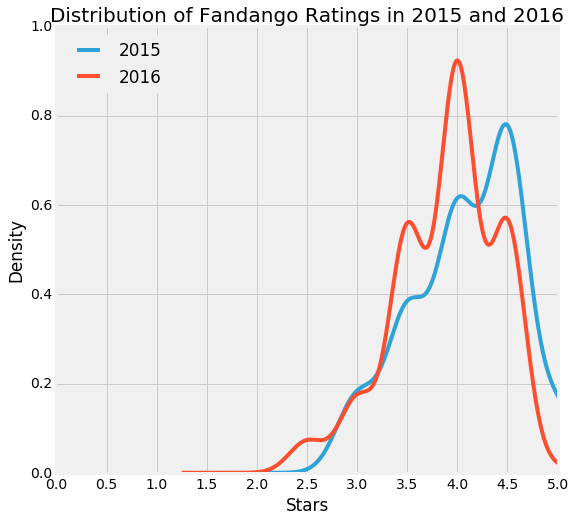

In [69]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(8,8))
plt.style.use('fivethirtyeight')
fandango_2015['Fandango_Stars'].plot.kde(label='2015', legend=True)
movie_2016['fandango'].plot.kde(label='2016', legend=True)
plt.title('Distribution of Fandango Ratings in 2015 and 2016', fontsize=20)
plt.xlabel('Stars')
plt.xlim(0,5)
plt.legend(loc='upper left')
plt.xticks(np.arange(0,5.1, step=0.5))
plt.show()

This is the markdown cell analyzing the above plot.

In [38]:
fandango_2015['Fandango_Stars'].value_counts(normalize=True).sort_index()*100

3.0     8.527132
3.5    17.829457
4.0    28.682171
4.5    37.984496
5.0     6.976744
Name: Fandango_Stars, dtype: float64

In [39]:
movie_2016['fandango'].value_counts(normalize=True).sort_index()*100

2.5     3.141361
3.0     7.329843
3.5    24.083770
4.0    40.314136
4.5    24.607330
5.0     0.523560
Name: fandango, dtype: float64

This is the markdown cell describing the differences visible in the two tables above.

In [42]:
centroids = pd.DataFrame()
centroids['2015'] = [fandango_2015['Fandango_Stars'].mean(),
                     fandango_2015['Fandango_Stars'].median(),
                     fandango_2015['Fandango_Stars'].mode()[0]]
centroids['2016'] = [movie_2016['fandango'].mean(),
                     movie_2016['fandango'].median(),
                     movie_2016['fandango'].mode()[0]]
centroids.index = ['mean', 'median', 'mode']
centroids

2015      2016
mean    4.085271  3.887435
median  4.000000  4.000000
mode    4.500000  4.000000

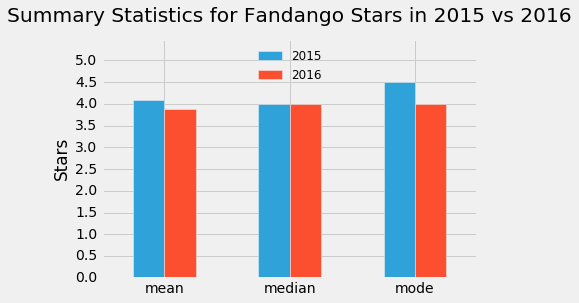

In [72]:
plt.figure(figsize=(8,8))
plt.style.use('fivethirtyeight')
centroids.plot.bar(rot=0)
plt.title('Summary Statistics for Fandango Stars in 2015 vs 2016', y=1.05)
plt.ylim(0,5.5)
plt.yticks(np.arange(0,5.1,0.5))
plt.ylabel('Stars')
plt.legend(framealpha=0,loc='upper center', fontsize=12)
plt.show()

This is the markdown cell containing the conclusion of the project.